### Import Libraries

In [1]:
import pandas as pd
import joblib
import numpy as np
from matplotlib import pyplot as plt
import ipaddress
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load Dataset

In [2]:
raw_data = pd.read_csv("../data/labelled/all_data_labelled.csv")

C:\Users\Abraham Audu\AppData\Local\Temp\ipykernel_13616\4009921456.py:1: DtypeWarning: Columns (0,2,6,14,16,34,45,49,52,55,62,63,67,70,74,79,82,85,88,89,96,97,100,101,102,103,104) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("../data/labelled/all_data_labelled.csv")


In [3]:
labelled_data = raw_data.copy()

In [6]:
labelled_data['label'].value_counts()

label
normal                1718513
mirai_udpflooding      949284
mirai_ackflooding       75632
dos_synflooding         58343
mitm_arpspoofing        42934
scanning_port           18122
mirai_httpflooding      10464
scanning_host            2454
scanning_os              1796
telnet_bruteforce        1424
host_discovery            463
Name: count, dtype: int64

In [7]:
# Encode the 'label' column
# Define the mapping dictionary
label_mapping = {'normal':0, 'dos_synflooding':1, 'mirai_ackflooding':2, 'host_discovery':3,
 'telnet_bruteforce':4, 'mirai_httpflooding':5, 'mirai_udpflooding':6,
 'mitm_arpspoofing':7, 'scanning_host':8, 'scanning_port':9, 'scanning_os':10}

# Assuming your DataFrame is named 'labelled_data' and the column you want to label encode is named 'label'
progress_bar = tqdm(total=len(labelled_data), desc='Label Encoding')

for i, value in enumerate(labelled_data['label']):
    labelled_data.at[i, 'label'] = label_mapping[value]
    progress_bar.update(1)

progress_bar.close()

labelled_data['label'] = labelled_data['label'].astype('int64')

Label Encoding: 100%|██████████| 2879429/2879429 [00:54<00:00, 52866.76it/s]


In [8]:
labelled_data['label'].value_counts()

label
0     1718513
6      949284
2       75632
1       58343
7       42934
9       18122
5       10464
8        2454
10       1796
4        1424
3         463
Name: count, dtype: int64

### Explore Dataset

In [18]:
labelled_data.sample(n=10)

,timestamp,ip_version,ip_hdr_len,ip_dsfield,ip_dsfield_dscp,ip_dsfield_ecn,ip_len,ip_id,ip_flags,ip_flags_rb,ip_flags_df,ip_flags_mf,ip_frag_offset,ip_ttl,ip_proto,ip_checksum,ip_checksum_status,ip_src,ip_addr,ip_src_host,ip_host,ip_dst,ip_dst_host,tcp_srcport,tcp_dstport,tcp_port,tcp_stream,tcp_completeness,tcp_len,tcp_seq,tcp_seq_raw,tcp_nxtseq,tcp_ack,tcp_ack_raw,tcp_hdr_len,tcp_flags,tcp_flags_res,tcp_flags_ae,tcp_flags_cwr,tcp_flags_ece,tcp_flags_urg,tcp_flags_ack,tcp_flags_push,tcp_flags_reset,tcp_flags_syn,tcp_flags_fin,tcp_flags_str,tcp_window_size_value,tcp_window_size,tcp_window_size_scalefactor,tcp_checksum,tcp_checksum_status,tcp_urgent_pointer,tcp_,tcp_time_relative,tcp_time_delta,tcp_analysis,tcp_analysis_bytes_in_flight,tcp_analysis_push_bytes_sent,udp_srcport,udp_dstport,udp_port,udp_length,udp_checksum,udp_checksum_status,udp_stream,udp_time_relative,udp_time_delta,eth_dst,eth_dst_resolved,eth_dst_oui,eth_dst_oui_resolved,eth_addr,eth_addr_resolved,eth_addr_oui,eth_addr_oui_resolved,eth_dst_lg,eth_lg,eth_dst_ig,eth_ig,eth_src,eth_src_resolved,eth_src_oui,eth_src_oui_resolved,eth_src_lg,eth_src_ig,eth_type,icmp_type,icmp_code,icmp_checksum,icmp_checksum_status,icmp_ident,icmp_ident_le,icmp_seq,icmp_seq_le,icmp_data_len,arp_hw_type,arp_proto_type,arp_hw_size,arp_proto_size,arp_opcode,arp_src_hw_mac,arp_src_proto_ipv4,arp_dst_hw_mac,arp_dst_proto_ipv4,label
2839219,1562823038.467728,4.0,20.0,0x00,0.0,0.0,82.0,0x7b9f,0x02,0.0,1.0,0.0,0.0,64.0,6.0,0x3d99,2.0,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.16,192.168.0.16,9020.0,52739.0,9020.0,1151.0,63.0,30.0,4.287164e+09,3.696836e+09,4.287164e+09,0.0,7.234655e+08,32.0,0x0018,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,·······AP···,1869.0,1869.0,-2.0,0x54ac,2.0,0.0,Timestamps,72.707278,0.000121,SEQ/ACK analysis,4014618.0,8358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",0,0,0,0,bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",0,0,0x0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
796878,1568094223.674836,4.0,20.0,0x02,0.0,2.0,200.0,0xa040,0x02,0.0,1.0,0.0,0.0,64.0,6.0,0x1880,2.0,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.16,192.168.0.16,9020.0,56255.0,9020.0,13.0,15.0,148.0,1.000000e+00,1.001586e+09,1.490000e+02,193.0,5.177156e+08,32.0,0x0018,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,·······AP···,1869.0,14952.0,8.0,0x550a,2.0,0.0,Timestamps,0.023467,0.000405,SEQ/ACK analysis,148.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",0,0,0,0,bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",0,0,0x0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
399247,1564039554.599006,4.0,20.0,0x88,34.0,0.0,1458.0,0x0000,0x02,0.0,1.0,0.0,0.0,64.0,17.0,0xb345,2.0,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.16,192.168.0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,10101.0,10000.0,1438.0,0x74f2,2.0,119.0,52.618926,0.000125,48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",0,0,0,0,bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",0,0,0x0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2655859,1562823897.412522,4.0,20.0,0x00,0.0,0.0,40.0,0x0000,0x02,0.0,1.0,0.0,0.0,64.0,6.0,0xb958,2.0,192.168.0.24,192.168.0.24,192.168.0.24,192.168.0.24,192.168.0.15,192.168.0.15,1046.0,41597.0,1046.0,901.0,1.0,0.0,1.000000e+00,0.000000e+00,1.000000e+00,1.0,8.380506e+08,20.0,0x0014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,·······A·R··,0.0,0.0,-2.0,0xb2c1,2.0,0.0,Timestamps,0.009985,0.009985,SEQ/AC

In [7]:
labelled_data.describe()

,ip_version,ip_dsfield_dscp,ip_dsfield_ecn,ip_flags_rb,ip_flags_df,ip_flags_mf,ip_frag_offset,ip_ttl,tcp_srcport,tcp_dstport,tcp_port,tcp_stream,tcp_completeness,tcp_len,tcp_seq,tcp_seq_raw,tcp_nxtseq,tcp_ack,tcp_ack_raw,tcp_flags_res,tcp_flags_ae,tcp_flags_cwr,tcp_flags_ece,tcp_flags_urg,tcp_flags_ack,tcp_flags_push,tcp_flags_reset,tcp_flags_syn,tcp_window_size_value,tcp_window_size,tcp_checksum_status,tcp_time_relative,tcp_analysis_bytes_in_flight,tcp_analysis_push_bytes_sent,udp_srcport,udp_dstport,udp_port,udp_checksum_status,udp_stream,udp_time_relative,eth_dst_lg,eth_lg,eth_dst_ig,eth_src_lg,icmp_type,icmp_checksum_status,icmp_ident,icmp_ident_le,icmp_seq,icmp_seq_le,icmp_data_len,arp_hw_size,arp_proto_size
count,2.869943e+06,2.869681e+06,2.869681e+06,2.869674e+06,2.869674e+06,2.869674e+06,2.869674e+06,2.869674e+06,1.488790e+06,1.488790e+06,1.488790e+06,1.488781e+06,1.488780e+06,1.488481e+06,1.488781e+06,1.488779e+06,1.488146e+06,1.488442e+06,1.488443e+06,1.488442e+06,1.435336e+06,1.435336e+06,1.435336e+06,1.488442e+06,1.488442e+06,1.488442e+06,1.488442e+06,1.488442e+06,1.488442e+06,1.487780e+06,1.488441e+06,1.488440e+06,6.929850e+05,6.925450e+05,1.343546e+06,1.343546e+06,1.343546e+06,1.343546e+06,1.343546e+06,1.343168e+06,2.879429e+06,2.879429e+06,2.879429e+06,2.879429e+06,36036.000000,36036.000000,1029.000000,1029.000000,1029.000000,1029.000000,1191.000000,5657.000000,5657.000000
mean,4.021707e+00,3.620575e+00,8.428696e-01,1.125563e-03,5.708495e-01,1.069808e-04,1.073640e+00,8.949260e+01,1.929207e+04,3.016919e+04,1.924180e+04,1.256169e+03,2.645975e+01,1.474533e+06,2.586930e+08,2.307428e+09,2.559720e+08,1.891585e+08,2.017311e+09,3.963876e-04,2.117971e-04,1.339059e-03,1.795398e-03,1.972532e-03,9.386352e-01,1.372778e-01,2.241001e-02,9.186183e-02,9.666402e+03,7.431615e+04,2.016991e+00,2.552752e+01,1.175977e+08,2.696876e+04,5.213346e+04,1.133837e+04,5.212947e+04,2.046862e+00,6.643812e+01,3.019881e+01,1.308593e-03,1.309635e-03,1.862522e-03,1.666997e-05,4.990842,3.186591,20263.243926,4444.267250,28.430515,973.312925,80.417296,5.944494,3.917624
std,5.868859e-01,1.051635e+01,4.810191e+01,3.353054e-02,4.949550e-01,1.034260e-02,6.994276e+01,4.005970e+01,2.139579e+04,2.259884e+04,2.138809e+04,2.630805e+03,3.957701e+01,7.953614e+07,9.816550e+08,1.358852e+09,9.793927e+08,8.575601e+08,1.360925e+09,1.990555e-02,1.455171e-02,3.656866e-02,4.233410e-02,4.436939e-02,2.399984e-01,3.441405e-01,1.480129e-01,2.888309e-01,1.404909e+04,3.636235e+06,1.599057e+01,3.724239e+01,3.596859e+08,6.525011e+04,1.853260e+04,9.516944e+03,1.854236e+04,2.336868e+00,6.766869e+01,2.773748e+01,3.615081e-02,3.616518e-02,4.311675e-02,4.082854e-03,2.094897,207.670284,8264.840489,11738.696819,87.180714,2984.137174,171.538460,0.328559,0.488484
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.300000e+01,5.300000e+01,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000
25%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.400000e+01,5.540000e+02,7.977000e+03,5.540000e+02,3.900000e+01,1.300000e+01,0.000000e+00,1.000000e+00,1.247569e+09,1.000000e+00,1.000000e+00,1.006243e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.520000e+02,1.869000e+03,2.000000e+00,6.910430e-01,1.441000e+03,1.418000e+03,5.199800e+04,8.899000e+03,5.199800e+04,2.000000e+00,1.600000e+01,4.502067e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,1.00

In [8]:
# Check count of missing values
labelled_data.isnull().sum()

: 

: 

#### Action Steps
- Remove coluns with values missing in the millions
- Drop missing values for columns missing a few thousand values

In [7]:
# Total number of records
len(labelled_data)

2879429

In [19]:
# Check the count of each label
labelled_data['label'].value_counts()

label
0     1718513
6      949284
2       75632
1       58343
7       42934
9       18122
5       10464
8        2454
10       1796
4        1424
3         463
Name: count, dtype: int64

<BarContainer object of 11 artists>

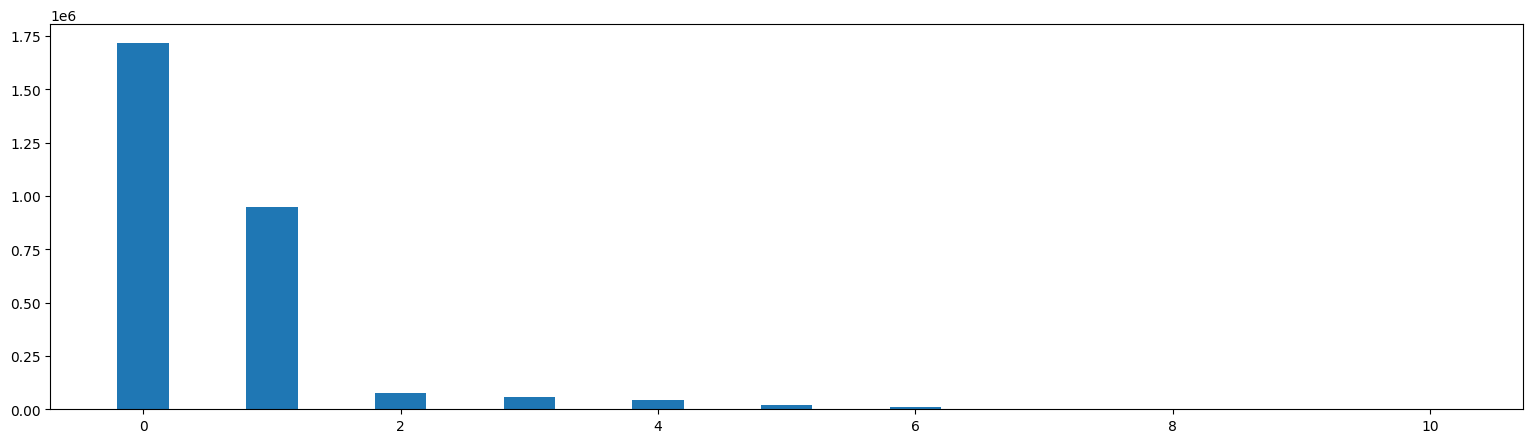

In [9]:
## Plot the distribution of labels

plt.figure(figsize=(19,5))
plt.bar(labelled_data['label'].unique(), labelled_data['label'].value_counts(), width=0.4)

##### Observation/Actions
- The dataset is imbalaced with the dos_synflooding being over-represented in the attack classes
- Data should be undersampled to balance the distribution of attacks

In [ ]:
split_data = {}

for i in labelled_data['label'].unique():
    split_data.update({f'{i}': labelled_data[labelled_data['label']==i]})

In [ ]:
split_data.keys()

dict_keys(['normal', 'dos_synflooding', 'mirai_ackflooding', 'host_discovery', 'telnet_bruteforce', 'mirai_httpflooding', 'mirai_udpflooding', 'mitm_arpspoofing', 'scanning_host', 'scanning_port', 'scanning_os'])

In [ ]:
split_data['normal'].isnull().sum()

timestamp                          6029
ip_version                         6029
ip_hdr_len                         6243
ip_dsfield                         6291
ip_dsfield_dscp                    6291
ip_dsfield_ecn                     6291
ip_len                             6291
ip_id                              6296
ip_flags                           6298
ip_flags_rb                        6298
ip_flags_df                        6298
ip_flags_mf                        6298
ip_frag_offset                     6298
ip_ttl                             6298
ip_proto                           6298
ip_checksum                        6298
ip_checksum_status                 6298
ip_src                             6302
ip_addr                            6302
ip_src_host                        6302
ip_host                            6302
ip_dst                             6302
ip_dst_host                        6883
tcp_srcport                      437851
tcp_dstport                      437851


In [ ]:
split_data['dos_synflooding'].isnull().sum()

timestamp                           0
ip_version                          0
ip_hdr_len                          0
ip_dsfield                          0
ip_dsfield_dscp                     0
ip_dsfield_ecn                      0
ip_len                              0
ip_id                               0
ip_flags                            0
ip_flags_rb                         0
ip_flags_df                         0
ip_flags_mf                         0
ip_frag_offset                      0
ip_ttl                              0
ip_proto                            0
ip_checksum                         0
ip_checksum_status                  0
ip_src                              0
ip_addr                             0
ip_src_host                         0
ip_host                             0
ip_dst                              0
ip_dst_host                         0
tcp_srcport                         0
tcp_dstport                         0
tcp_port                            0
tcp_stream  

Normal traffic has the most missing values, hence it could be used as a distinctive feature to separate betweeen normal packets and attack streams

##### Split the features into numerical and string, and then explore preprocessing options for each class

In [20]:
labelled_data.dtypes

timestamp                        object
ip_version                      float64
ip_hdr_len                       object
ip_dsfield                       object
ip_dsfield_dscp                 float64
ip_dsfield_ecn                  float64
ip_len                           object
ip_id                            object
ip_flags                         object
ip_flags_rb                     float64
ip_flags_df                     float64
ip_flags_mf                     float64
ip_frag_offset                  float64
ip_ttl                          float64
ip_proto                         object
ip_checksum                      object
ip_checksum_status               object
ip_src                           object
ip_addr                          object
ip_src_host                      object
ip_host                          object
ip_dst                           object
ip_dst_host                      object
tcp_srcport                     float64
tcp_dstport                     float64


#### Numerical Features

In [21]:
# Extract numerical features
all_features = labelled_data.columns
numerical_features = [feature for feature in all_features if labelled_data[feature].dtype=='float64' or labelled_data[feature].dtype=='int64']

In [22]:
len(numerical_features)

54

In [23]:
numerical_features

['ip_version',
 'ip_dsfield_dscp',
 'ip_dsfield_ecn',
 'ip_flags_rb',
 'ip_flags_df',
 'ip_flags_mf',
 'ip_frag_offset',
 'ip_ttl',
 'tcp_srcport',
 'tcp_dstport',
 'tcp_port',
 'tcp_stream',
 'tcp_completeness',
 'tcp_len',
 'tcp_seq',
 'tcp_seq_raw',
 'tcp_nxtseq',
 'tcp_ack',
 'tcp_ack_raw',
 'tcp_flags_res',
 'tcp_flags_ae',
 'tcp_flags_cwr',
 'tcp_flags_ece',
 'tcp_flags_urg',
 'tcp_flags_ack',
 'tcp_flags_push',
 'tcp_flags_reset',
 'tcp_flags_syn',
 'tcp_window_size_value',
 'tcp_window_size',
 'tcp_checksum_status',
 'tcp_time_relative',
 'tcp_analysis_bytes_in_flight',
 'tcp_analysis_push_bytes_sent',
 'udp_srcport',
 'udp_dstport',
 'udp_port',
 'udp_checksum_status',
 'udp_stream',
 'udp_time_relative',
 'eth_dst_lg',
 'eth_lg',
 'eth_dst_ig',
 'eth_src_lg',
 'icmp_type',
 'icmp_checksum_status',
 'icmp_ident',
 'icmp_ident_le',
 'icmp_seq',
 'icmp_seq_le',
 'icmp_data_len',
 'arp_hw_size',
 'arp_proto_size',
 'label']

In [24]:
numeric_data = labelled_data[numerical_features]

In [25]:
for feature in numerical_features:
    print(f"{feature}: {numeric_data[feature].nunique()}")

ip_version: 17
ip_dsfield_dscp: 44
ip_dsfield_ecn: 190
ip_flags_rb: 2
ip_flags_df: 2
ip_flags_mf: 2
ip_frag_offset: 452
ip_ttl: 207
tcp_srcport: 18315
tcp_dstport: 12207
tcp_port: 18571
tcp_stream: 17797
tcp_completeness: 182
tcp_len: 2182
tcp_seq: 307926
tcp_seq_raw: 448214
tcp_nxtseq: 307140
tcp_ack: 140035
tcp_ack_raw: 197196
tcp_flags_res: 2
tcp_flags_ae: 2
tcp_flags_cwr: 2
tcp_flags_ece: 2
tcp_flags_urg: 2
tcp_flags_ack: 2
tcp_flags_push: 2
tcp_flags_reset: 2
tcp_flags_syn: 2
tcp_window_size_value: 17638
tcp_window_size: 21294
tcp_checksum_status: 6
tcp_time_relative: 948890
tcp_analysis_bytes_in_flight: 31365
tcp_analysis_push_bytes_sent: 21695
udp_srcport: 1389
udp_dstport: 1080
udp_port: 1424
udp_checksum_status: 14
udp_stream: 838
udp_time_relative: 675859
eth_dst_lg: 2
eth_lg: 2
eth_dst_ig: 2
eth_src_lg: 2
icmp_type: 15
icmp_checksum_status: 4
icmp_ident: 33
icmp_ident_le: 33
icmp_seq: 3
icmp_seq_le: 4
icmp_data_len: 8
arp_hw_size: 2
arp_proto_size: 3
label: 11


Split the numerical features to categorical and continuous

In [26]:
numerical_features_categorical = [feature for feature in numerical_features if numeric_data[feature].nunique() < 20]
numerical_features_continuous = [feature for feature in numerical_features if feature not in numerical_features_categorical]

In [27]:
numeric_data[numerical_features_categorical].nunique()

ip_version              17
ip_flags_rb              2
ip_flags_df              2
ip_flags_mf              2
tcp_flags_res            2
tcp_flags_ae             2
tcp_flags_cwr            2
tcp_flags_ece            2
tcp_flags_urg            2
tcp_flags_ack            2
tcp_flags_push           2
tcp_flags_reset          2
tcp_flags_syn            2
tcp_checksum_status      6
udp_checksum_status     14
eth_dst_lg               2
eth_lg                   2
eth_dst_ig               2
eth_src_lg               2
icmp_type               15
icmp_checksum_status     4
icmp_seq                 3
icmp_seq_le              4
icmp_data_len            8
arp_hw_size              2
arp_proto_size           3
label                   11
dtype: int64

In [28]:
numeric_data[numerical_features_continuous].nunique()

ip_dsfield_dscp                     44
ip_dsfield_ecn                     190
ip_frag_offset                     452
ip_ttl                             207
tcp_srcport                      18315
tcp_dstport                      12207
tcp_port                         18571
tcp_stream                       17797
tcp_completeness                   182
tcp_len                           2182
tcp_seq                         307926
tcp_seq_raw                     448214
tcp_nxtseq                      307140
tcp_ack                         140035
tcp_ack_raw                     197196
tcp_window_size_value            17638
tcp_window_size                  21294
tcp_time_relative               948890
tcp_analysis_bytes_in_flight     31365
tcp_analysis_push_bytes_sent     21695
udp_srcport                       1389
udp_dstport                       1080
udp_port                          1424
udp_stream                         838
udp_time_relative               675859
icmp_ident               

In [29]:
# Explore the categorical numeric features
labelled_data[numerical_features_categorical].sample(n=10)

,ip_version,ip_flags_rb,ip_flags_df,ip_flags_mf,tcp_flags_res,tcp_flags_ae,tcp_flags_cwr,tcp_flags_ece,tcp_flags_urg,tcp_flags_ack,tcp_flags_push,tcp_flags_reset,tcp_flags_syn,tcp_checksum_status,udp_checksum_status,eth_dst_lg,eth_lg,eth_dst_ig,eth_src_lg,icmp_type,icmp_checksum_status,icmp_seq,icmp_seq_le,icmp_data_len,arp_hw_size,arp_proto_size,label
1165657,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
131450,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1788474,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2020618,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
739610,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2611315,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2192822,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2297112,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
402397,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1247943,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


Action for categorical numerical missing values: NaN values for each column will be represented by a category

In [30]:
# Explore the continuous numeric features
labelled_data[numerical_features_continuous].sample(n=10)

,ip_dsfield_dscp,ip_dsfield_ecn,ip_frag_offset,ip_ttl,tcp_srcport,tcp_dstport,tcp_port,tcp_stream,tcp_completeness,tcp_len,tcp_seq,tcp_seq_raw,tcp_nxtseq,tcp_ack,tcp_ack_raw,tcp_window_size_value,tcp_window_size,tcp_time_relative,tcp_analysis_bytes_in_flight,tcp_analysis_push_bytes_sent,udp_srcport,udp_dstport,udp_port,udp_stream,udp_time_relative,icmp_ident,icmp_ident_le
4132,0.0,2.0,0.0,64.0,9020.0,49784.0,9020.0,0.0,12.0,1388.0,1.126485e+06,3.547487e+09,1.127873e+06,1.0,4.049665e+09,1869.0,1869.0,9.595623,16549.0,20820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825545,34.0,0.0,0.0,64.0,39310.0,7760.0,39310.0,141.0,15.0,1400.0,5.879330e+05,2.541551e+09,5.893330e+05,1.0,4.258708e+09,1750.0,14000.0,5.482565,9580.0,8400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324498,0.0,0.0,0.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10101.0,56361.0,10101.0,16.0,29.592310,NaN,NaN
1600823,0.0,0.0,0.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60225.0,8899.0,60225.0,257.0,0.514636,NaN,NaN
2391831,0.0,2.0,0.0,64.0,9020.0,53190.0,9020.0,39.0,15.0,1388.0,1.136561e+07,3.739043e+09,1.136700e+07,193.0,2.346665e+09,1869.0,14952.0,9.527280,12522.0,12492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906350,0.0,0.0,0.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64774.0,9988.0,64774.0,7.0,34.171522,NaN,NaN
351016,34.0,0.0,0.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56361.0,10101.0,56361.0,16.0,82.618056,NaN,NaN
2004386,0.0,0.0,0.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64783.0,9988.0,64783.0,22.0,36.915317,NaN,NaN
2856543,0.0,0.0,0.0,56.0,62974.0,1057.0,62974.0,676.0,1.0,0.0,0.000000e+00,1.740971e+08,1.000000e+00,0.0,0.000000e+00,1024.0,1024.0,0.000882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2612993,0.0,0.0,0.0,64.0,52717.0,9020.0,52717.0,7.0,47.0,0.0,4.289235e+09,1.830285e+09,4.289235e+09,2716063.0,3.417445e+09,32505.0,32505.0,32.886137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Action for continuous numerical missing values: Replace with zero for all columns

#### String Features

In [31]:
# Extract string features
all_features = labelled_data.columns
string_features = [feature for feature in all_features if labelled_data[feature].dtype=='object']

In [32]:
string_data = labelled_data[string_features]

In [33]:
string_data.sample(n=10)

,timestamp,ip_hdr_len,ip_dsfield,ip_len,ip_id,ip_flags,ip_proto,ip_checksum,ip_checksum_status,ip_src,ip_addr,ip_src_host,ip_host,ip_dst,ip_dst_host,tcp_hdr_len,tcp_flags,tcp_flags_fin,tcp_flags_str,tcp_window_size_scalefactor,tcp_checksum,tcp_urgent_pointer,tcp_,tcp_time_delta,tcp_analysis,udp_length,udp_checksum,udp_time_delta,eth_dst,eth_dst_resolved,eth_dst_oui,eth_dst_oui_resolved,eth_addr,eth_addr_resolved,eth_addr_oui,eth_addr_oui_resolved,eth_ig,eth_src,eth_src_resolved,eth_src_oui,eth_src_oui_resolved,eth_src_ig,eth_type,icmp_code,icmp_checksum,arp_hw_type,arp_proto_type,arp_opcode,arp_src_hw_mac,arp_src_proto_ipv4,arp_dst_hw_mac,arp_dst_proto_ipv4
1934782,1564039232.1583,20.0,0x00,60.0,0x7443,0x00,17.0,0x44ce,2.0,192.168.0.24,192.168.0.24,192.168.0.24,192.168.0.24,210.89.164.90,210.89.164.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,0x5462,0.000001,88:36:6c:d7:1c:56,88:36:6c:d7:1c:56,8926828,EFM Networks,88:36:6c:d7:1c:56,88:36:6c:d7:1c:56,8926828,EFM Networks,0,04:32:f4:45:17:b3,04:32:f4:45:17:b3,275188,Partron,0,0x0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2645624,1562822842.956066,20.0,0x00,1440.0,0x4165,0x02,6.0,0x7285,2.0,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.16,192.168.0.16,32.0,0x0010,0.0,·······A····,8.0,0x1a52,0.0,Timestamps,0.000617,SEQ/ACK analysis,NaN,NaN,NaN,48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",0,bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",0,0x0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700831,1566284858.371582,20.0,0x00,52.0,0x0000,0x02,6.0,0xb956,2.0,192.168.0.16,192.168.0.16,192.168.0.16,192.168.0.16,192.168.0.13,192.168.0.13,32.0,0x0010,0.0,·······A····,16.0,0x8066,0.0,Timestamps,0.000343,NaN,NaN,NaN,NaN,bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",0,48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",0,0x0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784867,1567583923.610233,20.0,0x00,52.0,0x0000,0x02,6.0,0xb956,2.0,192.168.0.16,192.168.0.16,192.168.0.16,192.168.0.16,192.168.0.13,192.168.0.13,32.0,0x0010,0.0,·······A····,16.0,0xaf51,0.0,Timestamps,0.000356,SEQ/ACK analysis,NaN,NaN,NaN,bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",0,48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",0,0x0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084096,1564039371.41631,20.0,0x88,210.0,0x22af,0x02,17.0,0x9576,2.0,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.16,192.168.0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,0xc011,0.000075,48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",0,bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",0,0x0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2848625,1562823065.423973,20.0,0x00,82.0,0x84fa,0x02,6.0,0x343e,2.0,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.16,192.168.0.16,32.0,0x0018,0.0,·······AP···,-1.0,0x6773,0.0,Timestamps,0.000118,SEQ/ACK analysis,NaN,NaN,NaN,48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",0,bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",0,0x0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960022,1564039371.652633,20.0,0x88,1458.0,0x22c5,0x02,17.0,0x9080,2.0,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.13,192.168.0.16,192.168.0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1438.0,0xf377,0.001472,48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",48:4b:aa:2c:d8:f9,48:4b:aa:2c:d8:f9,4737962,"Apple, Inc.",0,bc:1c:81:4b:ae:ba,bc:1c:81:4b:ae:ba,12328065,"Sichuan iLink Technology Co., Ltd.",0,0x0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1472173,1564039265.079124,20.0

In [34]:
for feature in string_data.columns:
    print(f"{feature}: {string_data[feature].nunique()}")

timestamp: 2087889
ip_hdr_len: 20
ip_dsfield: 78
ip_len: 4869
ip_id: 65535
ip_flags: 9
ip_proto: 2418
ip_checksum: 65537
ip_checksum_status: 29
ip_src: 55148
ip_addr: 55148
ip_src_host: 55148
ip_host: 55165
ip_dst: 54737
ip_dst_host: 55449
tcp_hdr_len: 51
tcp_flags: 454
tcp_flags_fin: 16
tcp_flags_str: 786
tcp_window_size_scalefactor: 2958
tcp_checksum: 65537
tcp_urgent_pointer: 609
tcp_: 2918
tcp_time_delta: 103584
tcp_analysis: 228
udp_length: 1288
udp_checksum: 38955
udp_time_delta: 61046
eth_dst: 833
eth_dst_resolved: 844
eth_dst_oui: 620
eth_dst_oui_resolved: 24
eth_addr: 833
eth_addr_resolved: 844
eth_addr_oui: 620
eth_addr_oui_resolved: 13
eth_ig: 12
eth_src: 739
eth_src_resolved: 747
eth_src_oui: 363
eth_src_oui_resolved: 11
eth_src_ig: 9
eth_type: 491
icmp_code: 20
icmp_checksum: 15498
arp_hw_type: 4
arp_proto_type: 2
arp_opcode: 12
arp_src_hw_mac: 20
arp_src_proto_ipv4: 20
arp_dst_hw_mac: 121
arp_dst_proto_ipv4: 4094


In [35]:
# Split string features into categorical  and continuous
string_features_categorical = [feature for feature in string_features if string_data[feature].nunique() <= 20]
string_features_continuous = [feature for feature in string_features if feature not in string_features_categorical]

In [36]:
string_features_categorical

['ip_hdr_len',
 'ip_flags',
 'tcp_flags_fin',
 'eth_addr_oui_resolved',
 'eth_ig',
 'eth_src_oui_resolved',
 'eth_src_ig',
 'icmp_code',
 'arp_hw_type',
 'arp_proto_type',
 'arp_opcode',
 'arp_src_hw_mac',
 'arp_src_proto_ipv4']

In [37]:
string_features_continuous

['timestamp',
 'ip_dsfield',
 'ip_len',
 'ip_id',
 'ip_proto',
 'ip_checksum',
 'ip_checksum_status',
 'ip_src',
 'ip_addr',
 'ip_src_host',
 'ip_host',
 'ip_dst',
 'ip_dst_host',
 'tcp_hdr_len',
 'tcp_flags',
 'tcp_flags_str',
 'tcp_window_size_scalefactor',
 'tcp_checksum',
 'tcp_urgent_pointer',
 'tcp_',
 'tcp_time_delta',
 'tcp_analysis',
 'udp_length',
 'udp_checksum',
 'udp_time_delta',
 'eth_dst',
 'eth_dst_resolved',
 'eth_dst_oui',
 'eth_dst_oui_resolved',
 'eth_addr',
 'eth_addr_resolved',
 'eth_addr_oui',
 'eth_src',
 'eth_src_resolved',
 'eth_src_oui',
 'eth_type',
 'icmp_checksum',
 'arp_dst_hw_mac',
 'arp_dst_proto_ipv4']

In [ ]:
for feature in string_features_categorical:
    print(f"{feature}: {string_data[feature].unique()}")

ip_hdr_len: [20.0 nan 24.0 52.0 16.0 48.0 '20' '0x88' '0x00' '0xb8' '0x02' '20.0'
 '52.0' '4.0' 4.0 28.0 36.0 40.0 '24' '24.0' '0x80']
ip_flags: ['0x02' '0x00' nan '0x06' '0x07' '0x05' '0x04' '0x01' '0x03' '0']
tcp_flags_fin: [0.0 nan 1.0 '0' '1' '·······A····' '·······AP···' '··········S·'
 '·······A·R··' '·······A···F' '·RRA··UAP·S·' '0.0' '1.0' '·······A··S·'
 '·········R··' '·······AP··F' '·R··C·U··RS·']
eth_addr_oui_resolved: ['Apple, Inc.' 'Sichuan iLink Technology Co., Ltd.' nan
 'Samsung Electronics Co.,Ltd' 'Partron' 'EFM Networks'
 'Liteon Technology Corporation' '0' 'Intel Corporate' 'Hach Company'
 'Magic Leap, Inc.' '1' 'Huawei Technologies Co.,Ltd'
 'China Mobile Group Device Co.,Ltd.']
eth_ig: [0 1 '0' '48:4b:aa:2c:d8:f9' 'bc:1c:81:4b:ae:ba' '88:36:6c:d7:1c:56'
 '04:32:f4:45:17:b3' 'ac:e0:10:61:b0:cb' '1' '6c:40:08:bf:fe:46'
 'f0:18:98:5e:ff:9f' 'a8:2b:b9:d6:5d:9c']
eth_src_oui_resolved: ['Sichuan iLink Technology Co., Ltd.' 'Apple, Inc.' 'EFM Networks' nan
 'Partron' 'S

In [ ]:
for feature in string_features_continuous:
    print(f"{feature}: {string_data[feature].unique()}")

timestamp: [1558342574.859557 1558342574.859701 1558342574.859784 ...
 1562824357.592792 1562824357.592869 1562824357.598297]
ip_dsfield: ['0x02' '0x00' nan '0xc0' '0x82' '0xf3' '0xc2' '0x32' '0xe2' '0x70' '0x2a'
 '0x30' '0xa9' '0x88' '0x60' '0x80' '0x20' '0xe6' '0x1c' '0xda' '0x98'
 '0x40' '0x10' '0x89' '0xa0' '0xc8' '0xe8' '0xac' '0x8c' '0x8a' '0xb8'
 '34' '0' '46' '0xa8' '0x08' '0xe0' '0x3c' '0x8e' '0x72' '0x22' '0x42'
 '0x9a' '0x4a' '0x56' '0xf4' '0x12' '0xfa' '0x58' '0x44' '0x73' '0xa2'
 '0x71' '0xcc' '0xbf' '0xd0' '0x26' '0x2e' '0x23' '0xee' '0x6a' '0x6e'
 '0x1e' '0x52' '0x62' '0xf8' '0x54' '0x47' '0x05' '0x13' '0x09' '0x41'
 '0x01' '0x04' '0x11' '0x55' '0x78' '32' '0x38']
ip_len: [1440.0 82.0 52.0 ... '1365' 1463.0 28800.0]
ip_id: ['0x1032' '0x1033' '0x1034' ... '0xe55e' '0xe737' '0xe72f']
ip_proto: [6.0 17.0 nan ... '193' '129' 116.0]
ip_checksum: ['0xa3b6' '0xa903' '0xa3b4' ... '0x2bb9' '0x2c10' '0x2bcd']
ip_checksum_status: [2.0 nan '2' '192.168.0.13' '104.118.134.215' '192.1

In [ ]:
string_data['tcp_hdr_len'].unique()

array([32.0, nan, 16.0, 20.0, 40.0, 24.0, 8.0, 44.0, 0.0, 56.0, 36.0,
       48.0, 4.0, 52.0, 12.0, 28.0, 60.0, '20', '44', '32', '52', '40',
       '24', '0x0010', '0x0018', '0x0002', '0x0014', '0x0011', '0x073a',
       '20.0', '32.0', '44.0', '52.0', '60.0', '8', '12', '60', '24.0',
       '4.0', '40.0', '48.0', '0x0012', '0x0004', '0x0019', '4', '36',
       '28', '16', '0', '56', '28.0', '0x04a6'], dtype=object)

Action: Convert non-numerical values to floats 

In [38]:
def parse_columns(df):
    df = df.drop(['tcp_flags_str', 'tcp_flags_fin'], axis=1)  # Drop the 'tcp_flags_str' and 'tcp_flags_fin' column
    for col in tqdm(df.columns, desc= 'Parsing Columns', total=len(df.columns), unit=' Columns'):
        converted_values = []
        for value in tqdm(df[col], desc= f'Parsing Rows => {col}', total=len(df), unit=' Rows'):
            if pd.isna(value):
                converted_values.append(-3)  # Assign -3 for NaN values
            elif isinstance(value, (int, float)):
                converted_values.append(float(value))  # Convert numbers to float
            elif isinstance(value, str):
                try:
                    if value.startswith('0x'):
                        converted_values.append(int(value, 16))  # Convert hexadecimal string to int
                    elif '.' in value:
                        parts = value.split('.')
                        if len(parts) == 4:
                            ip = ipaddress.ip_address(value)
                            converted_values.append(int(ip))  # Convert IP address to int
                        else:
                            converted_values.append(float(value))  # Convert string representation of float to float
                    else:
                        converted_values.append(-4)  # Assign -4 for regular text values
                except ValueError:
                    converted_values.append(-4)  # Assign -4 for text that cannot be converted
                except ipaddress.AddressValueError:
                    converted_values.append(-4)  # Assign -4 for invalid IP addresses
            else:
                converted_values.append(-4)  # Assign -4 for other non-convertible values
        df[col] = converted_values
        df[col] = df[col].astype('float64')  # Typecast the column to float64
    return df


In [39]:
data_floats = parse_columns(labelled_data)


Parsing Columns: 100%|██████████| 104/104 [15:20<00:00,  8.85s/ Columns]


In [40]:
# data_floats.to_csv('../data/labelled/all_floats.csv', header=True, index=False, mode="w")

In [2]:
# Load float data
data_floats = pd.read_csv('../data/labelled/all_floats.csv')

In [44]:
string_features_categorical_new = ['ip_hdr_len', 'ip_flags', 'eth_addr_oui_resolved',
                                    'eth_ig', 'eth_src_oui_resolved', 'eth_src_ig',
                                    'icmp_code', 'arp_hw_type', 'arp_proto_type',
                                    'arp_opcode', 'arp_src_hw_mac', 'arp_src_proto_ipv4']

In [47]:
data_floats[string_features_categorical_new].sample(n=10)

,ip_hdr_len,ip_flags,eth_addr_oui_resolved,eth_ig,eth_src_oui_resolved,eth_src_ig,icmp_code,arp_hw_type,arp_proto_type,arp_opcode,arp_src_hw_mac,arp_src_proto_ipv4
2126149,20.0,0.0,-4.0,0.0,-4.0,0.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
2709122,20.0,2.0,-4.0,0.0,-4.0,0.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
86404,20.0,2.0,-4.0,0.0,-4.0,0.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
799073,20.0,2.0,-4.0,0.0,-4.0,0.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
1285412,20.0,0.0,-4.0,0.0,-4.0,0.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
2047183,20.0,0.0,-4.0,0.0,-4.0,0.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
2302951,20.0,2.0,-4.0,0.0,-4.0,0.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
2390913,20.0,0.0,-4.0,0.0,-4.0,0.0,1.0,-3.0,-3.0,-3.0,-3.0,-3.0
896074,20.0,2.0,-4.0,0.0,-4.0,0.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
210277,20.0,2.0,-4.0,0.0,-4.0,0.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0


In [48]:
data_floats['arp_src_hw_mac'].unique()

array([-3.00000000e+00, -4.00000000e+00,  3.23223552e+09,  3.23223554e+09,
        3.23223554e+09,  3.23223554e+09,  3.23223554e+09])

In [51]:
data_floats.dtypes

timestamp                       float64
ip_version                      float64
ip_hdr_len                      float64
ip_dsfield                      float64
ip_dsfield_dscp                 float64
ip_dsfield_ecn                  float64
ip_len                          float64
ip_id                           float64
ip_flags                        float64
ip_flags_rb                     float64
ip_flags_df                     float64
ip_flags_mf                     float64
ip_frag_offset                  float64
ip_ttl                          float64
ip_proto                        float64
ip_checksum                     float64
ip_checksum_status              float64
ip_src                          float64
ip_addr                         float64
ip_src_host                     float64
ip_host                         float64
ip_dst                          float64
ip_dst_host                     float64
tcp_srcport                     float64
tcp_dstport                     float64


In [61]:
float_features = data_floats.columns

# Split features into categorical  and continuous
float_features_categorical = [feature for feature in float_features if data_floats[feature].nunique() <= 20]
float_features_continuous = [feature for feature in float_features if feature not in float_features_categorical]

In [79]:
# float_features_OHE = float_features_categorical.copy()

# out = ['label', 'arp_src_hw_mac', 'eth_dst', 'eth_src', 'ip_hdr_len',
#         'eth_addr', 'icmp_seq', 'icmp_seq_le', 'icmp_data_len', 'arp_src_proto_ipv4'
#         ]
# for i in out:
#     float_features_OHE.remove(i)

In [4]:
float_features_OHE = [
    'ip_version', 'ip_flags', 'ip_flags_rb', 'ip_flags_df',
    'ip_flags_mf', 'tcp_flags_res', 'tcp_flags_ae', 'tcp_flags_cwr', 'tcp_flags_ece',
    'tcp_flags_urg', 'tcp_flags_ack', 'tcp_flags_push', 'tcp_flags_reset', 'tcp_flags_syn',
    'tcp_checksum_status', 'tcp_analysis', 'udp_checksum_status', 'eth_dst_resolved',
    'eth_dst_oui_resolved', 'eth_addr_resolved', 'eth_addr_oui_resolved', 'eth_dst_lg',
    'eth_lg', 'eth_dst_ig', 'eth_ig', 'eth_src_resolved', 'eth_src_oui_resolved',
    'eth_src_lg', 'eth_src_ig', 'icmp_type', 'icmp_code', 'icmp_checksum_status',
    'arp_hw_type', 'arp_proto_type', 'arp_hw_size', 'arp_proto_size', 'arp_opcode'
    ]

In [54]:
# float_features_continuous

['timestamp',
 'ip_dsfield',
 'ip_dsfield_dscp',
 'ip_dsfield_ecn',
 'ip_len',
 'ip_id',
 'ip_frag_offset',
 'ip_ttl',
 'ip_proto',
 'ip_checksum',
 'ip_checksum_status',
 'ip_src',
 'ip_addr',
 'ip_src_host',
 'ip_host',
 'ip_dst',
 'ip_dst_host',
 'tcp_srcport',
 'tcp_dstport',
 'tcp_port',
 'tcp_stream',
 'tcp_completeness',
 'tcp_len',
 'tcp_seq',
 'tcp_seq_raw',
 'tcp_nxtseq',
 'tcp_ack',
 'tcp_ack_raw',
 'tcp_hdr_len',
 'tcp_flags',
 'tcp_window_size_value',
 'tcp_window_size',
 'tcp_window_size_scalefactor',
 'tcp_checksum',
 'tcp_urgent_pointer',
 'tcp_',
 'tcp_time_relative',
 'tcp_time_delta',
 'tcp_analysis_bytes_in_flight',
 'tcp_analysis_push_bytes_sent',
 'udp_srcport',
 'udp_dstport',
 'udp_port',
 'udp_length',
 'udp_checksum',
 'udp_stream',
 'udp_time_relative',
 'udp_time_delta',
 'eth_dst_oui',
 'eth_addr_oui',
 'eth_src_oui',
 'eth_type',
 'icmp_checksum',
 'icmp_ident',
 'icmp_ident_le',
 'arp_dst_hw_mac',
 'arp_dst_proto_ipv4']

In [9]:
def encode_and_remove_columns(data, columns, encoder_path):
    # Create a OneHotEncoder object
    encoder = OneHotEncoder()

    # Encode the specified columns
    encoder.fit(data[columns])
    encoded_data = encoder.transform(data[columns])

    # Create a DataFrame from the encoded data
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(columns))

    # Remove the original columns from the dataset
    data.drop(columns, axis=1, inplace=True)

    # Concatenate the encoded DataFrame with the remaining columns of the dataset
    data = pd.concat([data, encoded_df], axis=1)

    # Save the encoder to memory
    joblib.dump(columns, 'encoder_columns.pkl')
    joblib.dump(encoder, encoder_path)

    return data

In [5]:
len(data_floats.columns)

104

In [7]:
encoder_path = 'cat_feat_encoder.pkl'

data_float_encoded = encode_and_remove_columns(data_floats, float_features_OHE, encoder_path)

In [8]:
len(data_float_encoded.columns)

244

In [86]:
data_float_encoded.sample(n=10)

,timestamp,ip_hdr_len,ip_dsfield,ip_dsfield_dscp,ip_dsfield_ecn,ip_len,ip_id,ip_frag_offset,ip_ttl,ip_proto,ip_checksum,ip_checksum_status,ip_src,ip_addr,ip_src_host,ip_host,ip_dst,ip_dst_host,tcp_srcport,tcp_dstport,tcp_port,tcp_stream,tcp_completeness,tcp_len,tcp_seq,tcp_seq_raw,tcp_nxtseq,tcp_ack,tcp_ack_raw,tcp_hdr_len,tcp_flags,tcp_window_size_value,tcp_window_size,tcp_window_size_scalefactor,tcp_checksum,tcp_urgent_pointer,tcp_,tcp_time_relative,tcp_time_delta,tcp_analysis_bytes_in_flight,tcp_analysis_push_bytes_sent,udp_srcport,udp_dstport,udp_port,udp_length,udp_checksum,udp_stream,udp_time_relative,udp_time_delta,eth_dst,eth_dst_oui,eth_addr,eth_addr_oui,eth_src,eth_src_oui,eth_type,icmp_checksum,icmp_ident,icmp_ident_le,icmp_seq,icmp_seq_le,icmp_data_len,arp_src_hw_mac,arp_src_proto_ipv4,arp_dst_hw_mac,arp_dst_proto_ipv4,label,ip_version_-3.0,ip_version_0.0,ip_version_1.0,ip_version_2.0,ip_version_3.0,ip_version_4.0,ip_version_5.0,ip_version_6.0,ip_version_7.0,ip_version_8.0,ip_version_9.0,ip_version_10.0,ip_version_11.0,ip_version_12.0,ip_version_13.0,ip_version_14.0,ip_version_15.0,ip_version_20.0,ip_flags_-4.0,ip_flags_-3.0,ip_flags_0.0,ip_flags_1.0,ip_flags_2.0,ip_flags_3.0,ip_flags_4.0,ip_flags_5.0,ip_flags_6.0,ip_flags_7.0,ip_flags_rb_-3.0,ip_flags_rb_0.0,ip_flags_rb_1.0,ip_flags_df_-3.0,ip_flags_df_0.0,ip_flags_df_1.0,ip_flags_mf_-3.0,ip_flags_mf_0.0,ip_flags_mf_1.0,tcp_flags_res_-3.0,tcp_flags_res_0.0,tcp_flags_res_1.0,tcp_flags_ae_-3.0,tcp_flags_ae_0.0,tcp_flags_ae_1.0,tcp_flags_cwr_-3.0,tcp_flags_cwr_0.0,tcp_flags_cwr_1.0,tcp_flags_ece_-3.0,tcp_flags_ece_0.0,tcp_flags_ece_1.0,tcp_flags_urg_-3.0,tcp_flags_urg_0.0,tcp_flags_urg_1.0,tcp_flags_ack_-3.0,tcp_flags_ack_0.0,tcp_flags_ack_1.0,tcp_flags_push_-3.0,tcp_flags_push_0.0,tcp_flags_push_1.0,tcp_flags_reset_-3.0,tcp_flags_reset_0.0,tcp_flags_reset_1.0,tcp_flags_syn_-3.0,tcp_flags_syn_0.0,tcp_flags_syn_1.0,tcp_checksum_status_-3.0,tcp_checksum_status_0.0,tcp_checksum_status_2.0,tcp_checksum_status_2291.0,tcp_checksum_status_2304.0,tcp_checksum_status_13330.0,tcp_checksum_status_13873.0,tcp_analysis_-4.0,tcp_analysis_-3.0,udp_checksum_status_-3.0,udp_checksum_status_0.0,udp_checksum_status_1.0,udp_checksum_status_2.0,udp_checksum_status_3.0,udp_checksum_status_4.0,udp_checksum_status_5.0,udp_checksum_status_6.0,udp_checksum_status_7.0,udp_checksum_status_10.0,udp_checksum_status_11.0,udp_checksum_status_14.0,udp_checksum_status_27.0,udp_checksum_status_63.0,udp_checksum_status_119.0,eth_dst_resolved_-4.0,eth_dst_oui_resolved_-4.0,eth_dst_oui_resolved_-3.0,eth_addr_resolved_-4.0,eth_addr_oui_resolved_-4.0,eth_addr_oui_resolved_-3.0,eth_dst_lg_0.0,eth_dst_lg_1.0,eth_lg_0.0,eth_lg_1.0,eth_dst_ig_0.0,eth_dst_ig_1.0,eth_ig_-4.0,eth_ig_0.0,eth_ig_1.0,eth_src_resolved_-4.0,eth_src_oui_resolved_-4.0,eth_src_oui_resolved_-3.0,eth_src_lg_0.0,eth_src_lg_1.0,eth_src_ig_-4.0,eth_src_ig_0.0,eth_src_ig_1.0,eth_src_ig_2048.0,eth_src_ig_2054.0,eth_src_ig_5888.0,eth_src_ig_8704.0,eth_src_ig_34525.0,eth_src_ig_53704.0,icmp_type_-3.0,icmp_type_0.0,icmp_type_1.0,icmp_type_3.0,icmp_type_5.0,icmp_type_8.0,icmp_type_11.0,icmp_type_22.0,icmp_type_23.0,icmp_type_37.0,icmp_type_53.0,icmp_type_76.0,icmp_type_140.0,icmp_type_147.0,icmp_type_197.0,icmp_type_240.0,icmp_code_-4.0,icmp_code_-3.0,icmp_code_0.0,icmp_code_1.0,icmp_code_3.0,icmp_code_9.0,icmp_code_29.0,icmp_code_32.0,icmp_code_60.0,icmp_code_65.0,icmp_code_81.0,icmp_code_148.0,icmp_code_178.0,icmp_code_179.0,icmp_code_187.0,icmp_code_198.0,icmp_code_231.0,icmp_code_242.0,icmp_code_43774.0,icmp_code_45822.0,icmp_checksum_status_-3.0,icmp_checksum_status_0.0,icmp_checksum_status_1.0,icmp_checksum_status_2.0,icmp_checksum_status_19713.0,arp_hw_type_-4.0,arp_hw_type_-3.0,arp_hw_type_1.0,arp_hw_type_2048.0,arp_proto_type_-4.0,arp_proto_type_-3.0,arp_proto_type_2048.0,arp_hw_size_-3.0,arp_hw_size_4.0,arp_hw_size_6.0,arp_proto_size_-3.0,arp_proto_size_1.0,arp_proto_size_2.0,arp_proto_size_4.0,arp_opcode_-4.0,arp_opcode_-3.0,arp_opcode_1